# Predicting Early Stage Diabetes Risk In Individuals using Machine Learning

## Project Outline

+ Problem Statement
+ Motivation
+ Dataset Information
+ Feature Processing and Feature Engineering
+ Machine Learning Model Development
+ Prediction
+ Evaluation the prediction using various metrics
+ Conlusion
+ References

### Problem Statement
* Diabetes is a very common disease with may risk factors that can lead to getting diabetes.
* Is it possible to predict whether a patient/individual is at risk of having early stage diabetes given the signs and symptoms?
* Since we are using an already labelled dataset to build a predictive model, our task will be a supervised machine learning problem.
* Therefore we will be using a supervised machine learning classification approach to solve our problem.

### Dataset Information
+ Datasource
    + https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset


+ Description
    + This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.
    + This dataser was published in Computer Vision and Machine Intelligence in Medical Image Analysis.


+ Metadata
    + The dataset is a multivariate dataset in a csv format.
    + It has 520 datapoints and 16 fields or attributes.


+ Attribute Information
    + Age 20-65
    + Sex 1. Male, 2.Female
    + Polyuria 1.Yes, 2.No.
    + Polydipsia 1.Yes, 2.No.
    + sudden weight loss 1.Yes, 2.No.
    + weakness 1.Yes, 2.No.
    + Polyphagia 1.Yes, 2.No.
    + Genital thrush 1.Yes, 2.No.
    + visual blurring 1.Yes, 2.No.
    + Itching 1.Yes, 2.No.
    + Irritability 1.Yes, 2.No.
    + delayed healing 1.Yes, 2.No.
    + partial paresis 1.Yes, 2.No.
    + muscle stiffness 1.Yes, 2.No.
    + Alopecia 1.Yes, 2.No.
    + Obesity 1.Yes, 2.No.
    + Class 1.Positive, 2.Negative.


### Data Preprocessing

In [3]:
# Load EDA(Exploratory Data Analysis) Packages
import numpy as np
import pandas as pd

In [4]:
# Load Data Vizualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Load Machine Learning Packages
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Import model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
# Check Package Versions
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
print("Sklearn version: ", sklearn.__version__)


Pandas version:  2.2.3
Numpy version:  2.1.3
Seaborn version:  0.13.2
Sklearn version:  1.6.1


#### Descriptive Analysis of Dataset

In [8]:
# Load the dataset
df = pd.read_csv("data/diabetes_data_upload.csv")

In [9]:
# Preview the first five rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [10]:
# Check the dimension of the dataset
df.shape

(520, 17)

In [11]:
# Check for column names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [12]:
# Check column data types
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [13]:
# Check how many missing values we have
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

#### Narrative

+ There are no missing values and we have 520 datapoints and 17 columns
+ Most of the columns/fields are of the Object type. We will need to convert them to a proper format


#### Data Cleaning

+ Convert the column names to a consistent case and format.
+ Encode the dataset into numeric format using either LabelEncoder or custom function
    + Gender: Female(0), Male(1)
    + Other Features: No(0), Yes(1)


In [14]:
# Converting the columns
df.columns.str.lower().str.replace(' ', '_')

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [17]:
#Encode the dataset
from sklearn.preprocessing import LabelEncoder

In [18]:
objList = df.select_dtypes(include='object').columns

In [19]:
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [20]:
columns_to_label_encode = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']


In [21]:
label_encoder = LabelEncoder()

In [22]:
# Encode every column except age, gender and class
for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [23]:
df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                 object
dtype: object

In [24]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [25]:
#List Initial Classes
print(label_encoder.classes_)

['No' 'Yes']


In [26]:
#Method 2: Using custom function for encoding gender and class columns
gender_map = {"Female":0, "Male":1}
target_label_map = {"Negative":0, "Positive":1}

In [27]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df['gender'] = df['gender'].map(gender_map)

In [29]:
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [30]:
# For target label, get unique values
df['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [31]:
# Encode the target class using a mapping dictionary
df['class'] = df['class'].map(target_label_map)

In [32]:
# Recheck Datatypes
df.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [34]:
# Recheck using Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [35]:
# Descriptive summary
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Narrative
+ From the descriptive summary, the minimum age is 16 and the maximum age is 90
+ We will have to get the distribution of data as per the age

In [36]:
# Value count per class
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

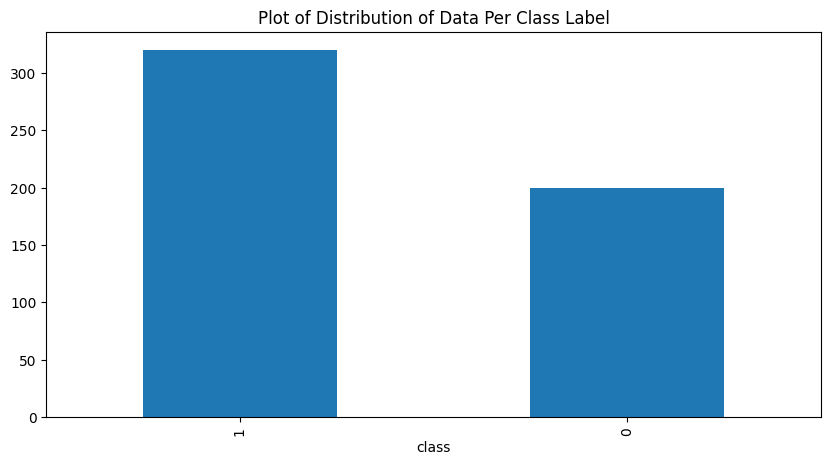

In [37]:
# Plot of distribution of data per class label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class Label")
df['class'].value_counts().plot(kind='bar')
plt.show()

#### Narrative
+ Our dataset has
    + 320 datapoints for class 1(Positive)
    + 200 datapoints for class 0(Negative)
+ This looks like a balanced dataset from the plot of the value counts

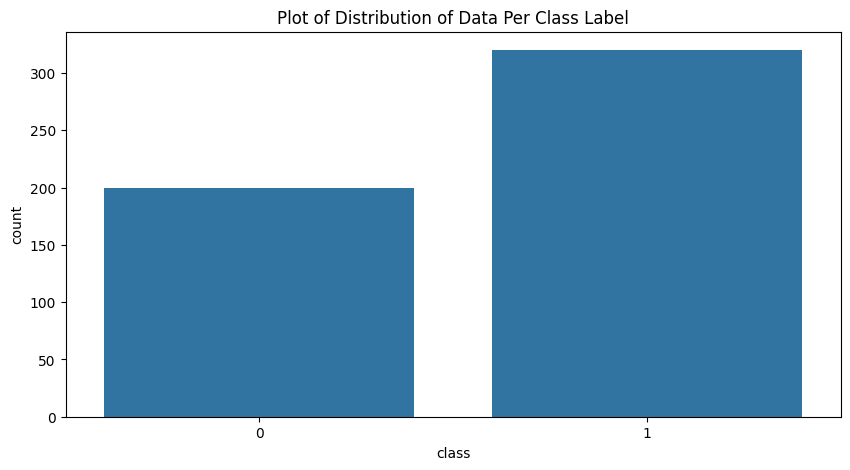

In [38]:
# Plot of distribution of data per class label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class Label")
sns.countplot(x=df['class'], data=df)
plt.show()

In [39]:
# Value count of Gender
df['gender'].value_counts()

gender
1    328
0    192
Name: count, dtype: int64

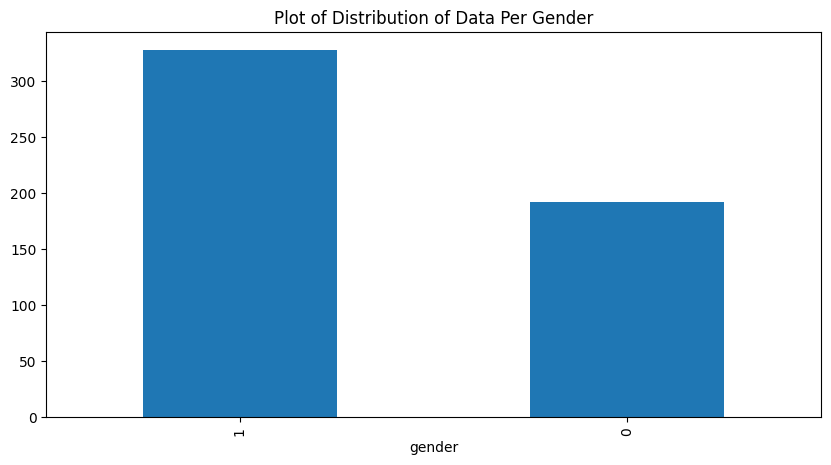

In [40]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Gender")
df['gender'].value_counts().plot(kind='bar')
plt.show()

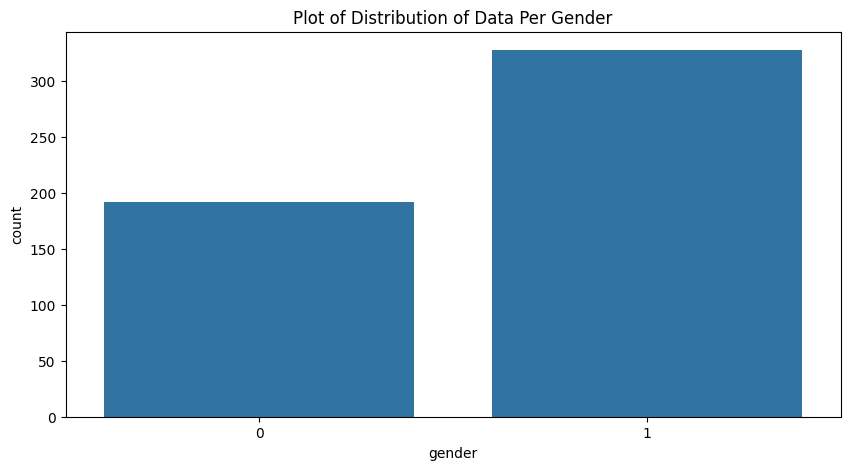

In [45]:
# Plot of distribution of data per gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Gender")
sns.countplot(x=df['gender'], data=df)
plt.show()

#### Narrative
+ Our dataset has
    + 328 datapoints for class 1(Male)
    + 192 datapoints for class 0(Female)
+ There are more males than females
                    

Frequency Distribution Table using the Age Range

In [41]:
### find the minimum and maximum age
print("Maximum age: ", df['age'].max())
print("Minimum age: ", df['age'].min())

Maximum age:  90
Minimum age:  16


In [42]:
labels = ["less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80 and more"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [43]:
freq_df = df.groupby(pd.cut(df['age'],bins=bins, labels=labels)).size()

C:\Users\indr1\AppData\Local\Temp\ipykernel_8320\546388043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_df = df.groupby(pd.cut(df['age'],bins=bins, labels=labels)).size()


In [44]:
freq_df.head()

age
less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [45]:
freq_df = freq_df.reset_index(name='count')

In [46]:
freq_df.head()

,age,count
0,less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


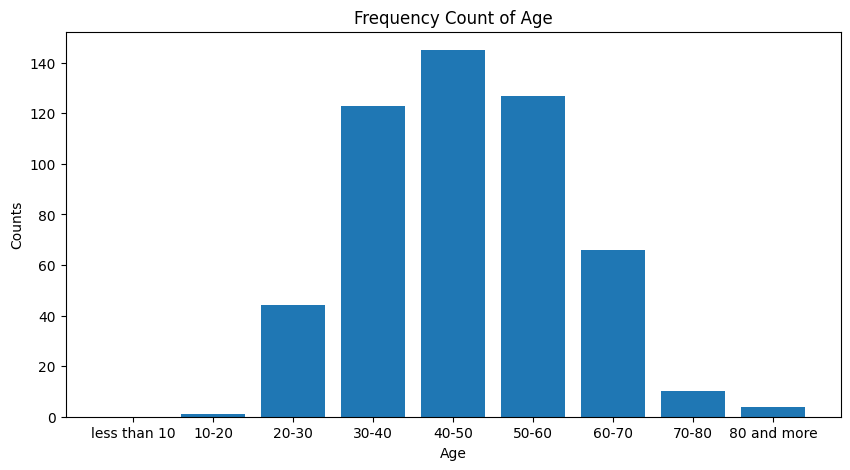

In [47]:
# Plot of distribution of data per gender (using Matplotlib)
plt.figure(figsize=(10,5)) 
plt.bar(freq_df['age'], freq_df['count'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()
        

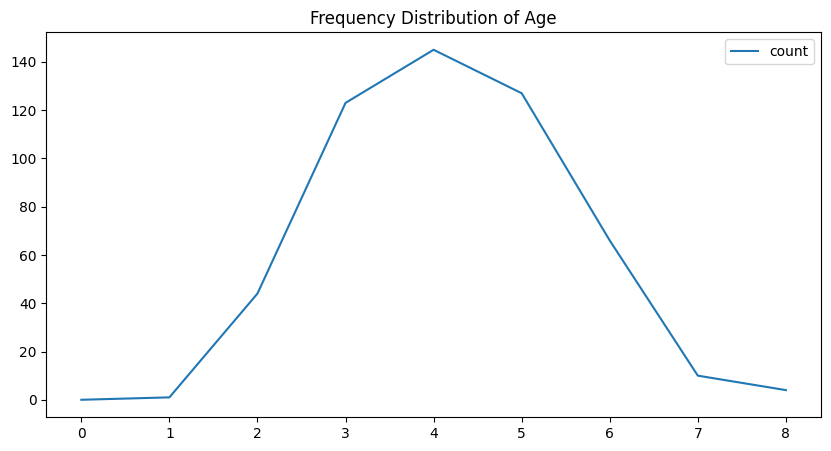

In [48]:
# Plot of distribution of data per gender (using dataframe's plot method)
freq_df.plot(kind='line', figsize=(10,5))
plt.title('Frequency Distribution of Age')
plt.show()

#### Narrative

+ Highest prevalence of Diabetes is from 40-50 followed by 50-60 and 30-40
+ The least is individual under 20, and elderly above 80

<Axes: ylabel='age'>

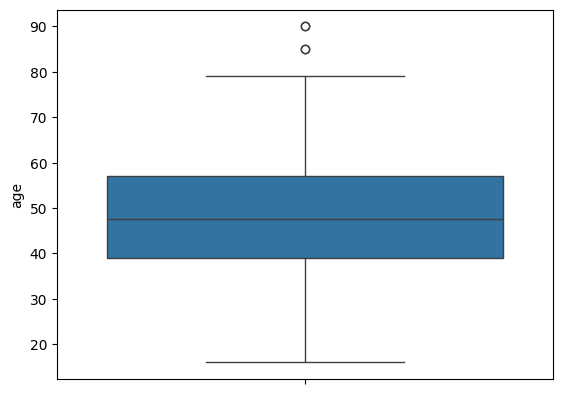

In [49]:
# Find outliers in age using Boxplot
sns.boxplot(df['age'])

#### Correlation Analysis of Features in Relation to Target Class (Early Stage Risk)

+ We will explore the dataset to see if there is an association between the features and the target class label

In [51]:
# Method 1 (using dataframe's corr() method)
df.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


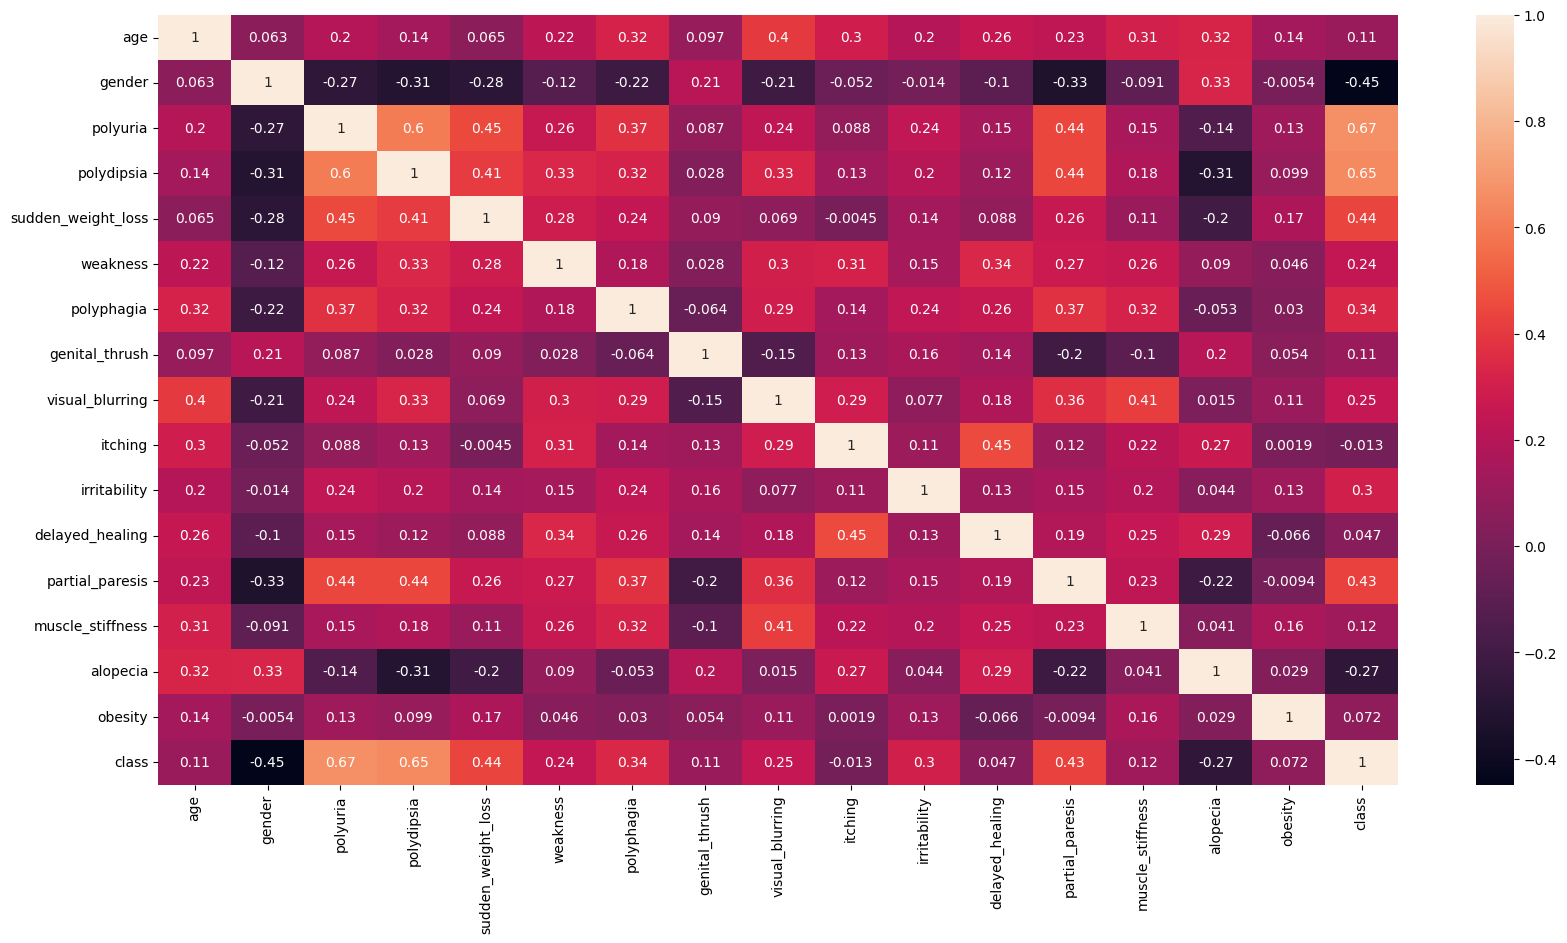

In [52]:
# Plot correlation using Seaborn's Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [53]:
corr_matrix = df.corr()

<Axes: >

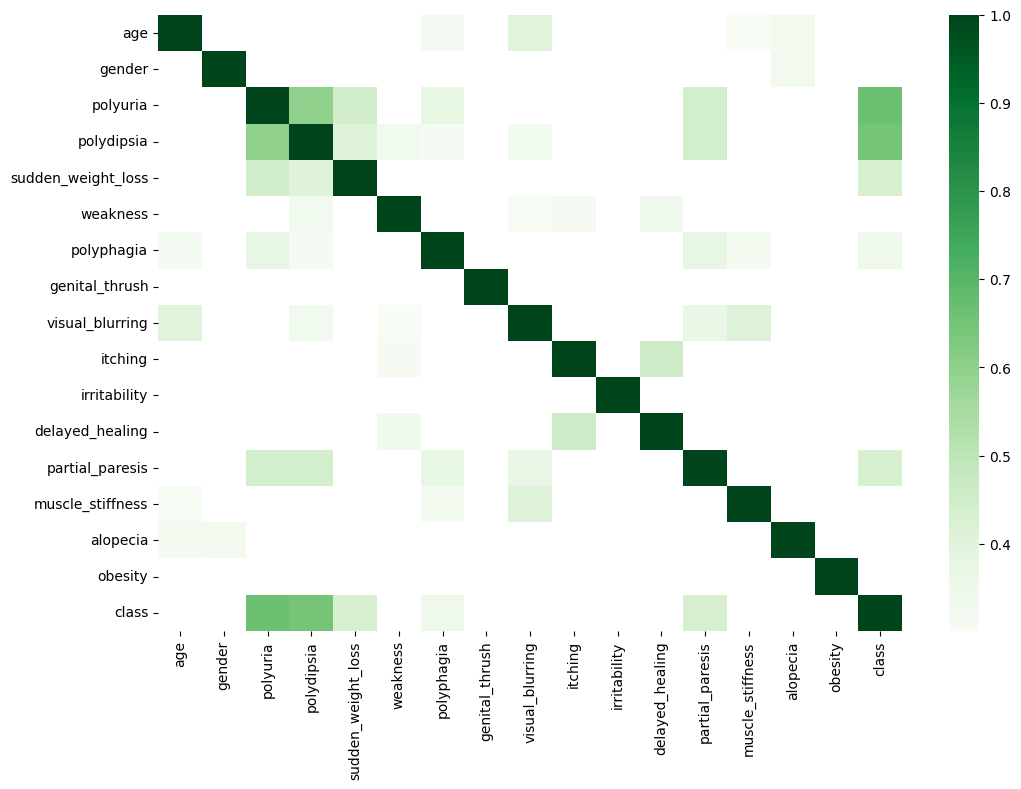

In [54]:
highest_corr = corr_matrix[corr_matrix>=.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap="Greens")

In [55]:
# List features with the highest correlation coefficient
s = corr_matrix.abs().unstack()
top_features_per_selection = s.sort_values(kind='quicksort')

In [56]:
print(top_features_per_selection)

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
gender              obesity               0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
obesity             obesity               1.000000
gender              gender                1.000000
age                 age                   1.000000
Length: 289, dtype: float64


### Feature Engineering and Selection
+ A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done.
+ Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.
+ We will be using feature selection techniques to find the most informative features for our model.

In [57]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [59]:
# Features and Labels
# Which columns are for features and for labels
X = df[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']]
y=df['class']

In [60]:
# Find the best features using SelectKBest
k_best = SelectKBest(score_func=chi2, k=10) # Top 10 features
best_feature_fit = k_best.fit(X, y)

In [61]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Score'])

In [62]:
feature_column_names = pd.DataFrame(X.columns, columns=['Feature_Name'])
best_feature_df = pd.concat([feature_scores, feature_column_names], axis=1)

In [63]:
# List Features
best_feature_df

,Feature_Score,Feature_Name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [64]:
# Get the best features
# The higher the number the more important the feature
best_feature_df.nlargest(10, "Feature_Score")

,Feature_Score,Feature_Name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [65]:
# List columns/features we will be using
best_feature_df.nlargest(12, "Feature_Score")["Feature_Name"].unique()

array(['polydipsia', 'polyuria', 'sudden_weight_loss', 'partial_paresis',
       'gender', 'irritability', 'polyphagia', 'alopecia', 'age',
       'visual_blurring', 'weakness', 'genital_thrush'], dtype=object)

#### Narrative

+ From our analysis, polydipsia, polyuria, sudden weight loss and partial paresis play an important role in making our prediction
+ This confirms an already established fact for signs of diabetes, that is, polydipsia, polyuria and polyphagia.

Check which of these features are important using ExtraTreesClassifier

In [66]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X, y)

ExtraTreesClassifier()

In [67]:
# Print importance of features
print(et_clf.feature_importances_)

[0.05347844 0.112591   0.23069474 0.17030344 0.06116892 0.01862218
 0.03588716 0.02510165 0.03412488 0.03458594 0.04701401 0.03518086
 0.05166196 0.02946503 0.04146164 0.01865818]


In [68]:
# Convert to a DataFrame
feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns)

In [69]:
feature_importance_df.head()

age                   0.053478
gender                0.112591
polyuria              0.230695
polydipsia            0.170303
sudden_weight_loss    0.061169
dtype: float64

<Axes: >

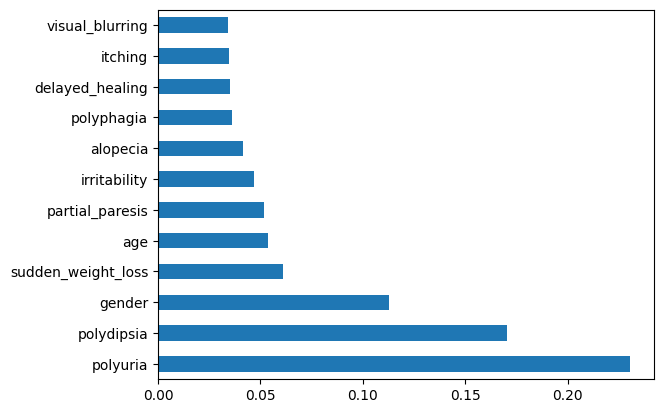

In [70]:
feature_importance_df.nlargest(12).plot(kind='barh')

#### Narrative
+ Using ExtraTreesClassifier algorithm, we found out similar result with the SelectKBest
+ Polyuria, polydipsia, gender, sudden weight loss, age and partial_paresis are the most important features
+ Almost like the previous, except that the order of gender and sudden weight loss was changed
+ However since this is a health issue we will be using all the features as there can be diverse scenario due to different life style and physiology of individuals


### Machine Learning Model Development

+ We will be using building a supervised machine learning classification model using several algorithms namely,
    + Logistic Regression
    + Decision Tree Classifier

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
# Features
print(X.columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [73]:
# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:
# Shape of the dataset
print("Shape of the original dataset: ", df.shape)
print("Shape of the training dataset: ", x_train.shape)
print("Shape of the testing dataset: ", y_test.shape)

Shape of the original dataset:  (520, 17)
Shape of the training dataset:  (364, 16)
Shape of the testing dataset:  (156,)


In [75]:
# Using LogisticRegression estimator to build a model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [76]:
# Check model accuracy
# Method 1
lr_model.score(x_test, y_test)

0.9358974358974359

In [77]:
# Check model prediction
y_pred = lr_model.predict(x_test)

In [78]:
# Using accuracy score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy Score of the Logistic Regression Model: {}".format(accuracy_score(y_test, y_pred)))


Accuracy Score of the Logistic Regression Model: 0.9358974358974359


#### Narrative
+ Using the LogisticRegression Machine Learning Estimator our model had an accuracy score of 0.935 (93.5%)
+ We will have to evaluate our model with other metrics such as classification report (since this is a classification problem) and confusion matrix 

### Model Evaluation
+ Using Classification Report
    + This function creates a text report showing the main classification metrics such as precision, recall and f1-score
    + Precision: refers to the ability of the classifier not to label as positive a sample that is negative.
    + Recall: refers to the ability of the classifier to find all the positive samples.

+ Using Confusin Matrix
+ ROC Curve
+ Precision Recall Curve


In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
target_names = ['Negative(0)', 'Positive(1)']

### Classification Report

+ "Macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrquent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often false, such that macro-averaging will over emphasize the typically low performance on an infrequent class.

+ "Weighted" accounts for class imbalance by computing the average of binary metrics in which each class's score is weighted by its presence in the true data sample.

+ "Micro" gives each sample class pair an equal contribution to the overall metric (except as a result of sample weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

+ "Samples" applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.

In [81]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.91      0.91      0.91        54
 Positive(1)       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [82]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[49,  5],
       [ 5, 97]])

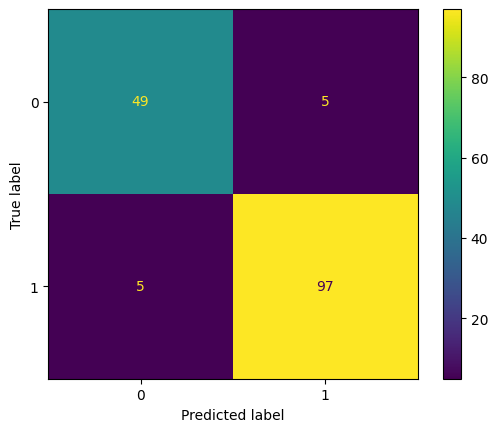

In [83]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr_model, x_test, y_test)

#### ROC Curve
+ Receiver Operating Characteristic (ROC) curve is another common tool used with binary classifiers.
+ It is similar to the precision recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (or recall) against the false positive rate.
+ A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5 .

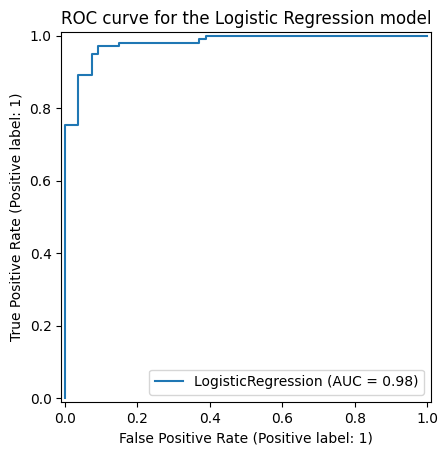

In [84]:
# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr_model, x_test, y_test)
plt.title("ROC curve for the Logistic Regression model")
plt.show()

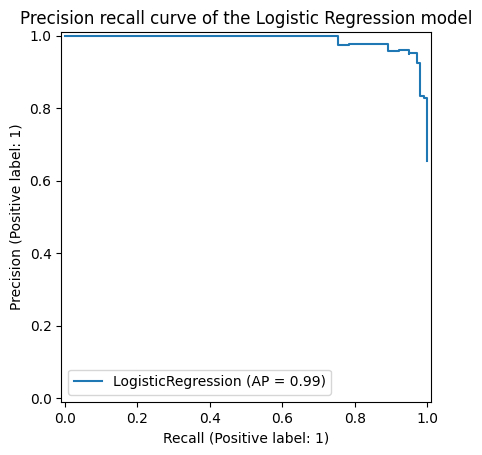

In [85]:
# Plot precision recall curve
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(lr_model, x_test, y_test)
plt.title("Precision recall curve of the Logistic Regression model")
plt.show()

In [86]:
# Using yellowbrick for the the evaluation curves
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC

np.float64(0.9894747273829252)

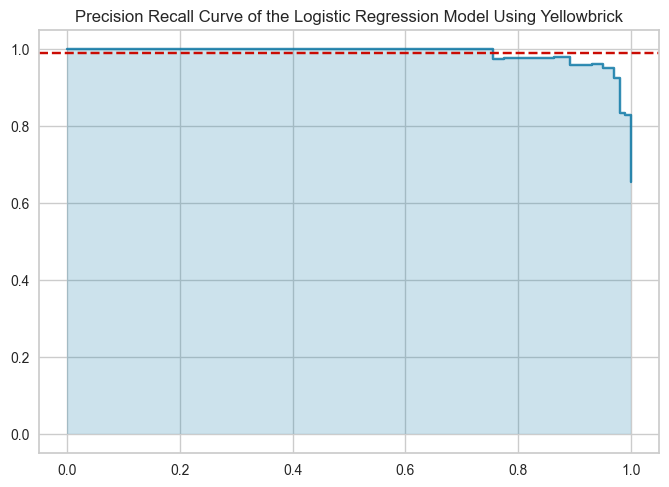

In [87]:
# Plot of the precision recall curve using yellowbrick
precision_recall = PrecisionRecallCurve(LogisticRegression())
plt.title("Precision Recall Curve of the Logistic Regression Model Using Yellowbrick")
precision_recall.fit(x_train, y_train)
precision_recall.score(x_test, y_test)

In [88]:
# Save the plot
precision_recall.show(outpath='precision_recall_curve_lr.png')

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

<Figure size 800x550 with 0 Axes>

np.float64(0.9819086676064761)

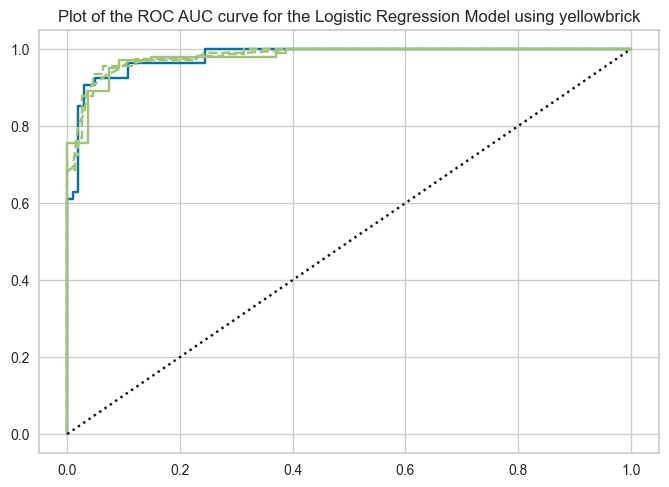

In [89]:
# Plot ROC Curve using yellowbrick
roc_auc = ROCAUC(LogisticRegression())
plt.title("Plot of the ROC AUC curve for the Logistic Regression Model using yellowbrick")
roc_auc.fit(x_train, y_train)
roc_auc.score(x_test, y_test)


In [90]:
roc_auc.finalize()
roc_auc.show(outpath='roc_auc_curve_lr.png')

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 800x550 with 0 Axes>

### Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
def cross_validate_model(model_estimator, X, y, cv):
    """Evaluating model using cross validation of KFolds"""
    score = cross_val_score(model_estimator, X, y, scoring='accuracy', cv=cv)
    # report performance
    result = "Mean Accuracy: {} Standard Deviation: {}".format(np.mean(score), np.std(score))
    return result

In [93]:
# Cross validation for logistic Regression
cv_score_for_lr_model = cross_validate_model(LogisticRegression(), X, y,3)
print(cv_score_for_lr_model)

Mean Accuracy: 0.9230837375146722 Standard Deviation: 0.01904408717760427


#### Using Decision Tree Classifier Model

In [94]:
dt_model = DecisionTreeClassifier()

In [95]:
# Fit the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
# Check model accuracy
y_pred_dt = dt_model.predict(x_test)
# Using accuracy score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of the Decision Tree model: {}".format(accuracy_score(y_test, y_pred_dt)))


Accuracy of the Decision Tree model: 0.9551282051282052


#### Narrative

+ Comparing our two models, Logistic Regression and Decision Tree, the Decision Tree Classifier has a higher accuracy score (0.95) than Logistic Regression Classifier (0.93)

In [97]:
# Classification report for our Decision Tree Model
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.91      0.96      0.94        54
 Positive(1)       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



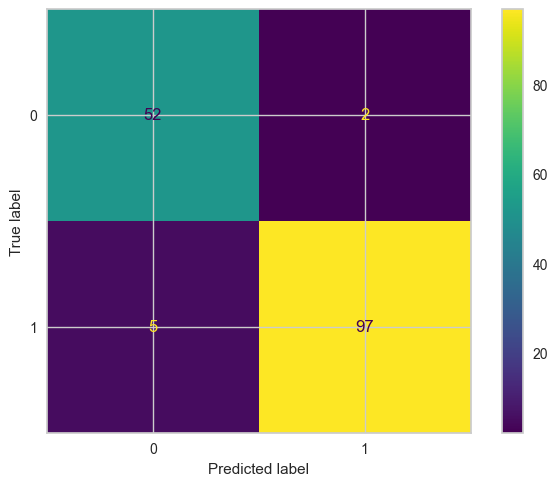

In [98]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test)

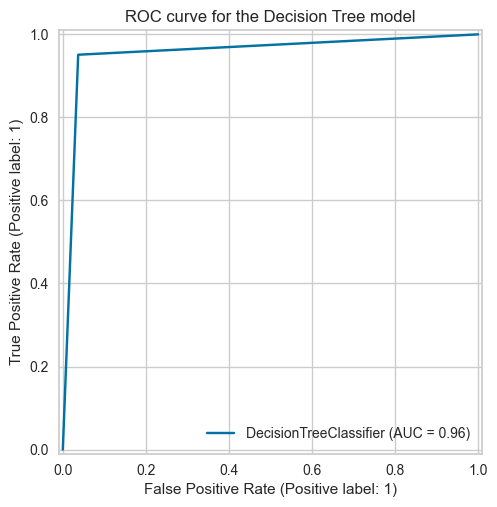

In [99]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(dt_model, x_test, y_test)
plt.title("ROC curve for the Decision Tree model")
plt.show()

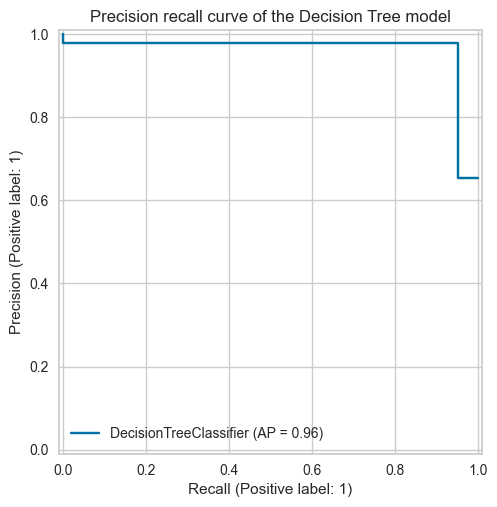

In [100]:
# Plot precision recall curve
PrecisionRecallDisplay.from_estimator(dt_model, x_test, y_test)
plt.title("Precision recall curve of the Decision Tree model")
plt.show()

np.float64(0.9618736383442266)

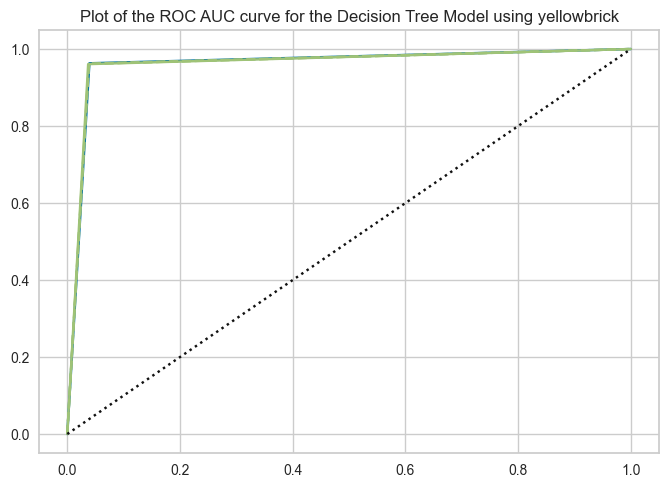

In [101]:
# Plot ROC Curve using yellowbrick
roc_auc_dt = ROCAUC(DecisionTreeClassifier())
plt.title("Plot of the ROC AUC curve for the Decision Tree Model using yellowbrick")
roc_auc_dt.fit(x_train, y_train)
roc_auc_dt.score(x_test, y_test)

np.float64(0.967209653092006)

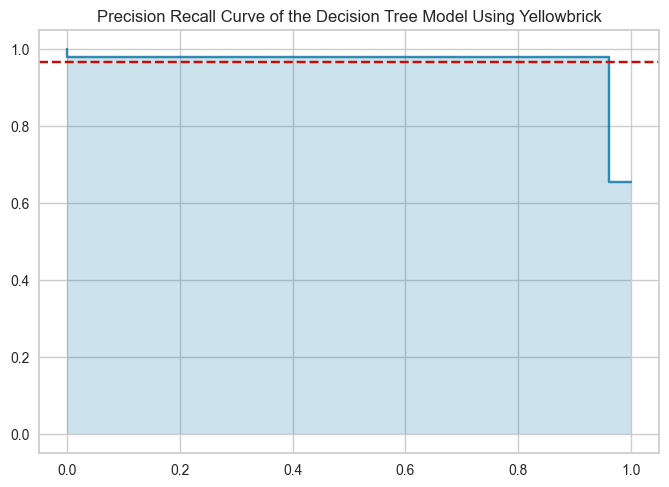

In [102]:
# Plot precision recall curve (usually used for imbalanced dataset)
precision_recall_dt = PrecisionRecallCurve(DecisionTreeClassifier())
plt.title("Precision Recall Curve of the Decision Tree Model Using Yellowbrick")
precision_recall_dt.fit(x_train, y_train)
precision_recall_dt.score(x_test, y_test)

### Using F1 Score to Compare Both the Models

+ The F1 score is the harmonic mean of precision and recall
+ The regular mean treats all values equally, while the harmonic mean gives much more weight to low values.
+ Therefore, the classifier will only get a high F1 score if both recall and precision are high.
+ The F1 score favors classifiers that have similar precision and recall.

In [103]:
# Compare models using F1 score
from sklearn.metrics import f1_score
f1_score_lr_model = f1_score(y_test, y_pred, average='macro')
f1_score_dt_model = f1_score(y_test, y_pred_dt, average='macro')

In [104]:
print("F1 Score for Logistic Regression Model: ", f1_score_lr_model)
print("F1 Score for Decision Tree Model: ", f1_score_dt_model)


F1 Score for Logistic Regression Model:  0.9291938997821351
F1 Score for Decision Tree Model:  0.9510555331450854


#### Narrative
+ The Decision Tree Classifier does better than the Logistic Regression Classifier.


#### Exploring how the Decision Tree classifier works

In [105]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz

In [106]:
# Set graphviz to PATH environmental variable
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [107]:
feature_names = X.columns

In [111]:
# Create a Dot Plot
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=feature_names, class_names=target_names)

In [112]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

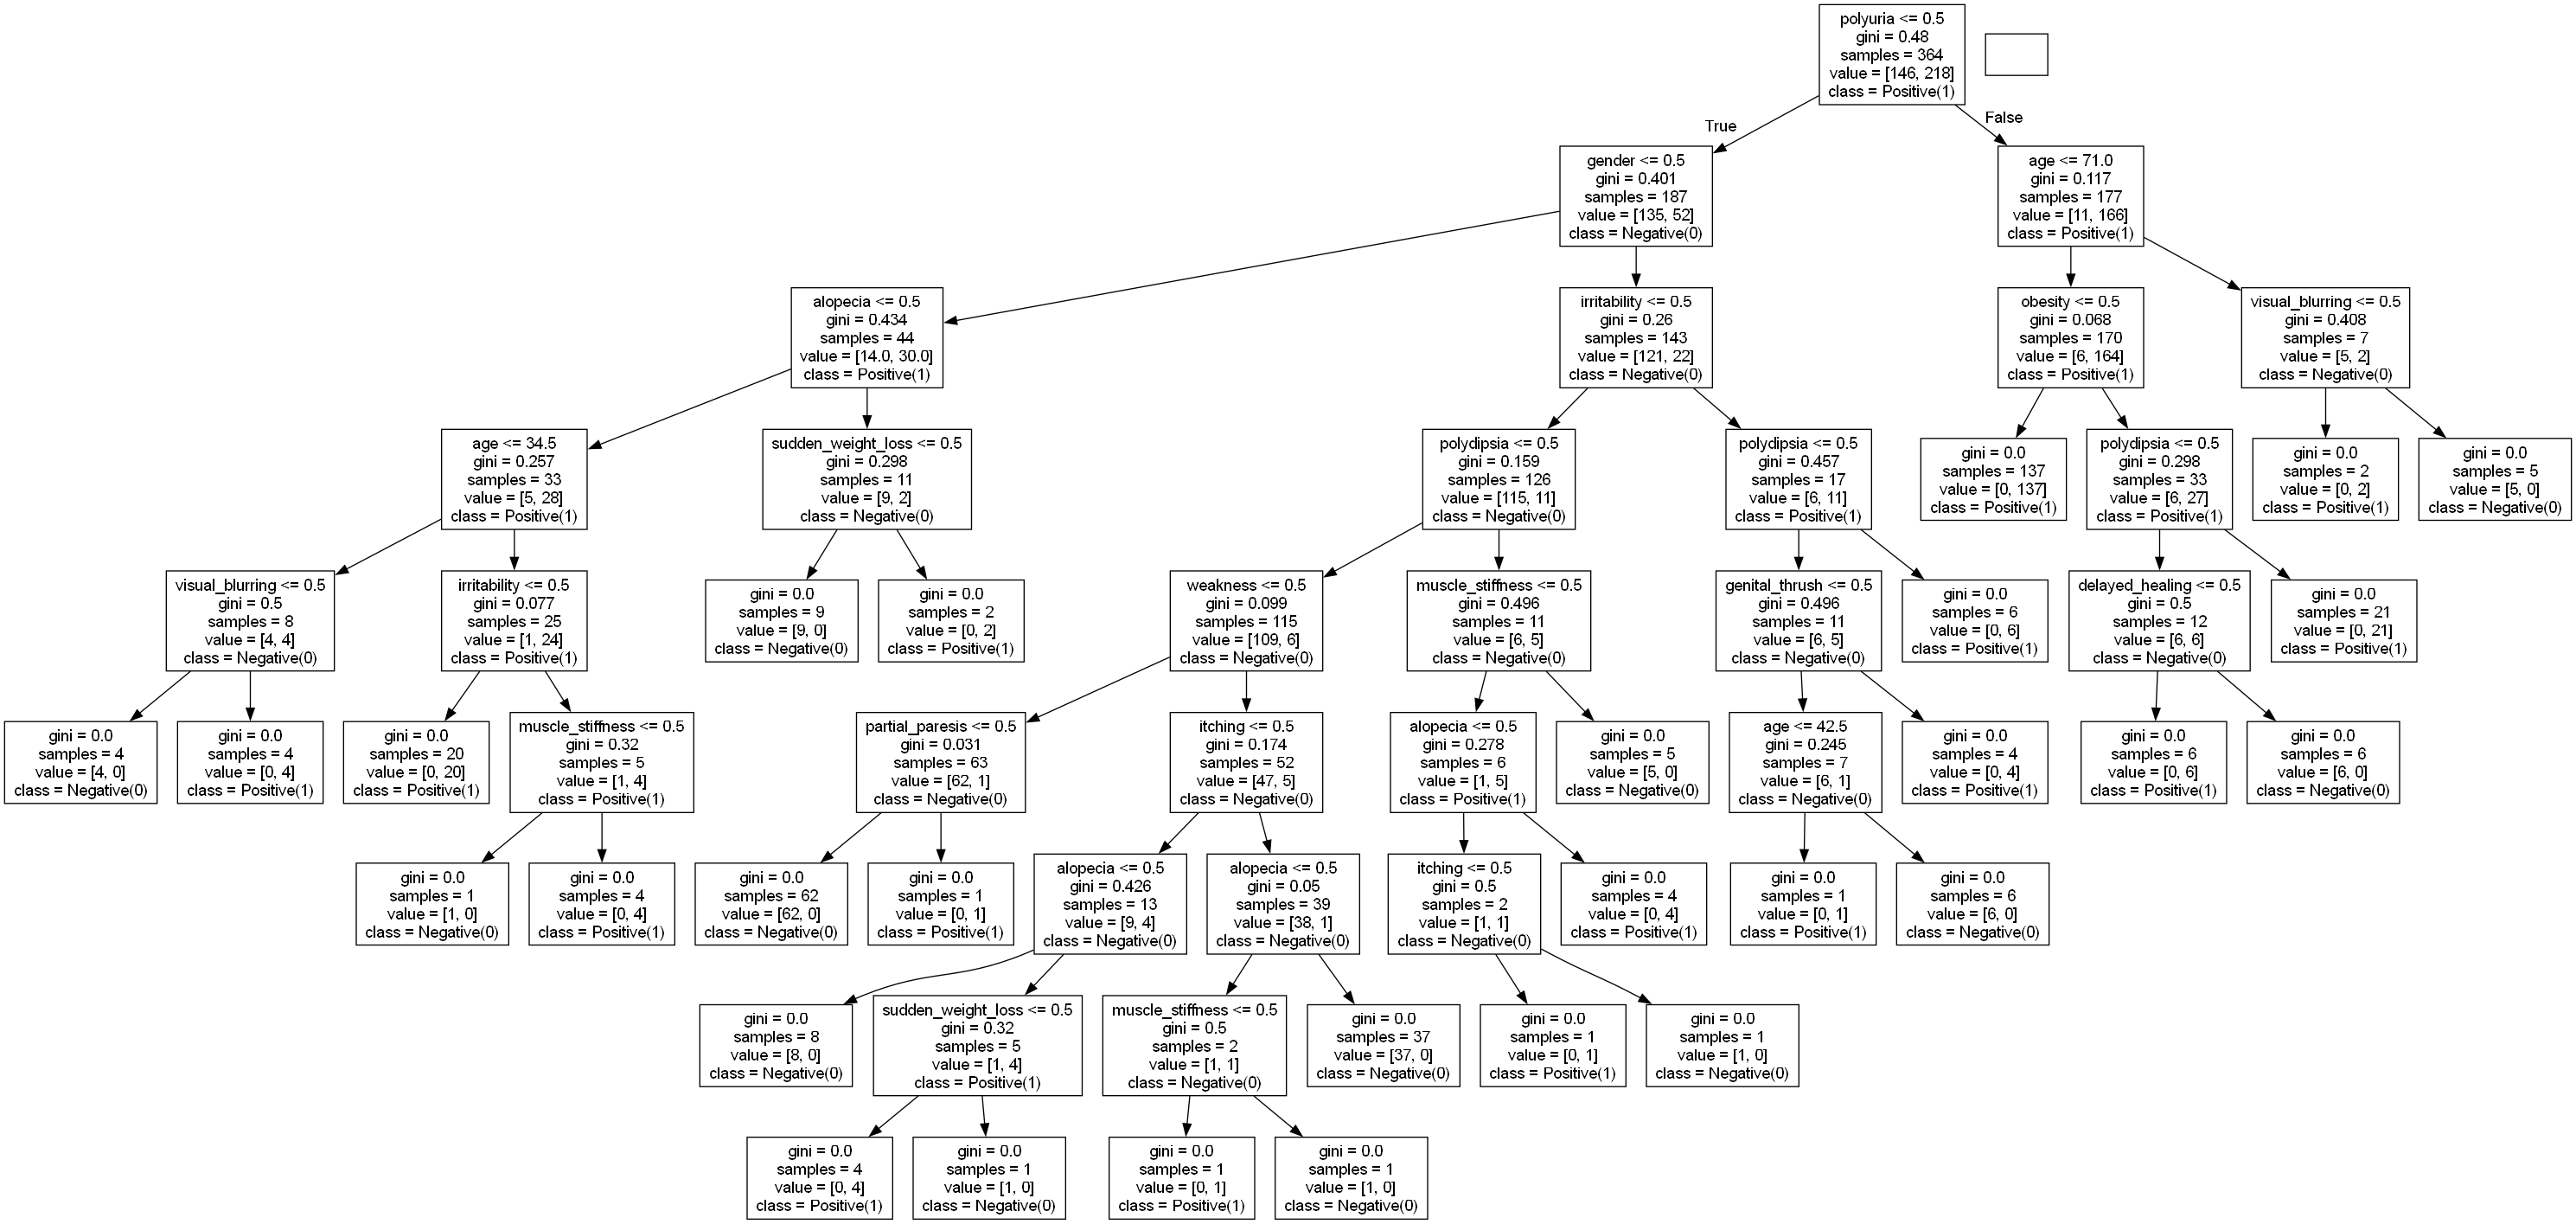

In [113]:
Image(graph.create_png())

In [114]:
# Save the plot
graph.write_png("decision_tree_diagram_for_diabetes.png")

True

In [115]:
# Cross validation for decision tree
cv_score_for_dt_model = cross_validate_model(DecisionTreeClassifier(), X, y, 5)

In [116]:
print(cv_score_for_dt_model)

Mean Accuracy: 0.9596153846153846 Standard Deviation: 0.031246301556292176


### Saving the models

In [117]:
# Using joblib
import joblib

In [118]:
print("Joblib version: ", joblib.__version__)

Joblib version:  1.4.2


In [119]:
# Save the Logistic Regression model
lr_model_file = open("logistic_regression_model_for_diabetes_prediction.pkl", "wb")
joblib.dump(lr_model, lr_model_file)
lr_model_file.close()

In [120]:
# Save the Decision Tree model
dt_model_file = open("decision_tree_model_for_diabetes_prediction.pkl", "wb")
joblib.dump(dt_model, dt_model_file)
dt_model_file.close()

### Model Interpretation

+ We will be trying to see how our model makes a prediction or classification
+ This allows us to see into our "black box" model to know how each feature contributes to make a prediction.

In [121]:
import eli5

In [124]:
print("Feature Names: ", feature_names.tolist())
print("Class Names: ", target_names)

Feature Names:  ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
Class Names:  ['Negative(0)', 'Positive(1)']


In [125]:
# Show how each feature contributes
eli5.show_weights(lr_model, feature_names=feature_names.tolist(), target_names=target_names)

Weight?,Feature
+2.560,polydipsia
+2.463,polyuria
+1.313,irritability
+1.204,genital_thrush
+1.014,partial_paresis
+1.008,<BIAS>
+0.917,sudden_weight_loss
+0.672,visual_blurring
+0.495,weakness
+0.316,polyphagia


In [126]:
# Let us make a prediction and interpret it
x_test.iloc[7]

age                   45
gender                 1
polyuria               0
polydipsia             0
sudden_weight_loss     0
weakness               1
polyphagia             0
genital_thrush         0
visual_blurring        0
itching                1
irritability           1
delayed_healing        1
partial_paresis        1
muscle_stiffness       0
alopecia               0
obesity                0
Name: 228, dtype: int64

In [127]:
# Make a prediction on x_test[7]
example = np.array(x_test.iloc[7]).reshape(1,-1)

In [128]:
lr_model.predict(example)

C:\Users\indr1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [129]:
# Check prediction probability
lr_model.predict_proba(example)

C:\Users\indr1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.80645521, 0.19354479]])

#### Narrative
+ Our model predict the sample as Negative with a probability of 0.80 or 80% certainty

In [130]:
# Show how each feature contributes to our prediction
eli5.show_prediction(lr_model, x_test.iloc[7], feature_names=feature_names.tolist(), target_names=target_names)

#### Interpretation
+ the reason our model gave us Negative for our prediction is because the most important features of polydipsia, polyphagia and sudden weight loss had low contribution values

In [131]:
cv_score_for_dt_model

'Mean Accuracy: 0.9596153846153846 Standard Deviation: 0.031246301556292176'

In [132]:
cv_score_for_lr_model

'Mean Accuracy: 0.9230837375146722 Standard Deviation: 0.01904408717760427'

### Conclusion

Our task was to build a Machine Learning model to predict early stage diabetes risk given the symptoms and signs of an individual. In our analysis we found out that the following features had a greater importance and influence on our prediction than the others. These features were also helpful in interpreting why our Logistic Regression made some classification. These features include:

    Polydipsia
    Polyuria
    Sudden Weight Loss
    Age
    Partial Paresis

Moreover our models, Logistic Regression and Decision Tree classifiers have a better model accuracy with the Decision Tree classifier model being the highest. Using cross validation we found out that even the Logistic Regression model can give us an accuracy of 0.92 with a standard deviation of 0.019, while the Decision Tree model having the accuracy of 0.95 with the standard deviation of 0.031. Hence, the Decision Tree model performs better than the Logistic Regression model.

To conclude, we can use these machine learning models to predict early stage diabetes risk with a higher accuracy and metrics.
